<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: PCA Visualization


---

### Outline:

- [Part I](#parti): Guided PCA Example with the [heptathlon performance dataset](../../../../resource-datasets/heptathlon/heptathlon.csv)
- [Part II](#partii): Try PCA yourself with the [wine quality dataset](../../../../resource-datasets/wine_data/winequality_merged.csv).

### In this lab, we will:

- Practice cleaning data.
- Perform PCA and interpret the principal components.
- Validate PCA results using visualizations and intuition.

---

<a id="parti"></a>

## Part I: Heptathlon Dataset

### 1. Load packages and heptathlon data

In [1]:
import warnings
from IPython.display import display
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

The athlete names make a natural index, and they are non-numeric
so no need to exclude them when making matrices.

In [2]:
hep = pd.read_csv(
    '../../../../resource-datasets/heptathlon/heptathlon.csv', index_col=0)

hep.head(3)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858


### 2. Create dataframe excluding athlete and score

In [3]:
# Doublecheck the number of entries, number of null values, and proper data types
hep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Joyner-Kersee (USA) to Launa (PNG)
Data columns (total 8 columns):
hurdles     25 non-null float64
highjump    25 non-null float64
shot        25 non-null float64
run200m     25 non-null float64
longjump    25 non-null float64
javelin     25 non-null float64
run800m     25 non-null float64
score       25 non-null int64
dtypes: float64(7), int64(1)
memory usage: 1.8+ KB


In [4]:
hep.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [5]:
# Note that in some events, a high number is good whereas others it is bad.
# - javelin is distance thrown (higher is better)
# - shot is distance thrown (higher is better)
# - longjump is distance jumped (higher is better)


# PROBLEM: Running events are time taken (lower is better)
#   - So, we'll normalize to m/s   (higher is better)

hep['hurdles'] = 100. / hep['hurdles']
hep['run200m'] = 200. / hep['run200m']
hep['run800m'] = 800. / hep['run800m']

hep.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),7.880221,1.86,15.80,8.865248,7.27,45.66,6.225196,7291
John (GDR),7.782101,1.80,16.23,8.456660,6.71,42.56,6.343165,6897
Behmer (GDR),7.575758,1.83,14.20,8.658009,6.68,44.54,6.441224,6858
Sablovskaite (URS),7.347539,1.80,15.23,8.361204,6.25,42.78,6.049607,6540
Choubenkova (URS),7.401925,1.74,14.76,8.357710,6.32,47.46,6.254887,6540


### 3. Examine the correlation between the different events

Plot a heatmap if you want to get fancy. What does the correlation matrix tell you?

In [6]:
hep.corr()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
hurdles,1.000000,0.779116,0.683805,0.802977,0.923797,0.043982,0.751634,0.934811
highjump,0.779116,1.000000,0.440786,0.473068,0.782442,0.002153,0.555286,0.767359
shot,0.683805,0.440786,1.000000,0.680184,0.743073,0.268989,0.447601,0.799699
run200m,0.802977,0.473068,0.680184,1.000000,0.814783,0.336934,0.633435,0.860900
longjump,0.923797,0.782442,0.743073,0.814783,1.000000,0.067108,0.697887,0.950437
javelin,0.043982,0.002153,0.268989,0.336934,0.067108,1.000000,0.025919,0.253147
run800m,0.751634,0.555286,0.447601,0.633435,0.697887,0.025919,1.000000,0.777813
score,0.934811,0.767359,0.799699,0.860900,0.950437,0.253147,0.777813,1.000000


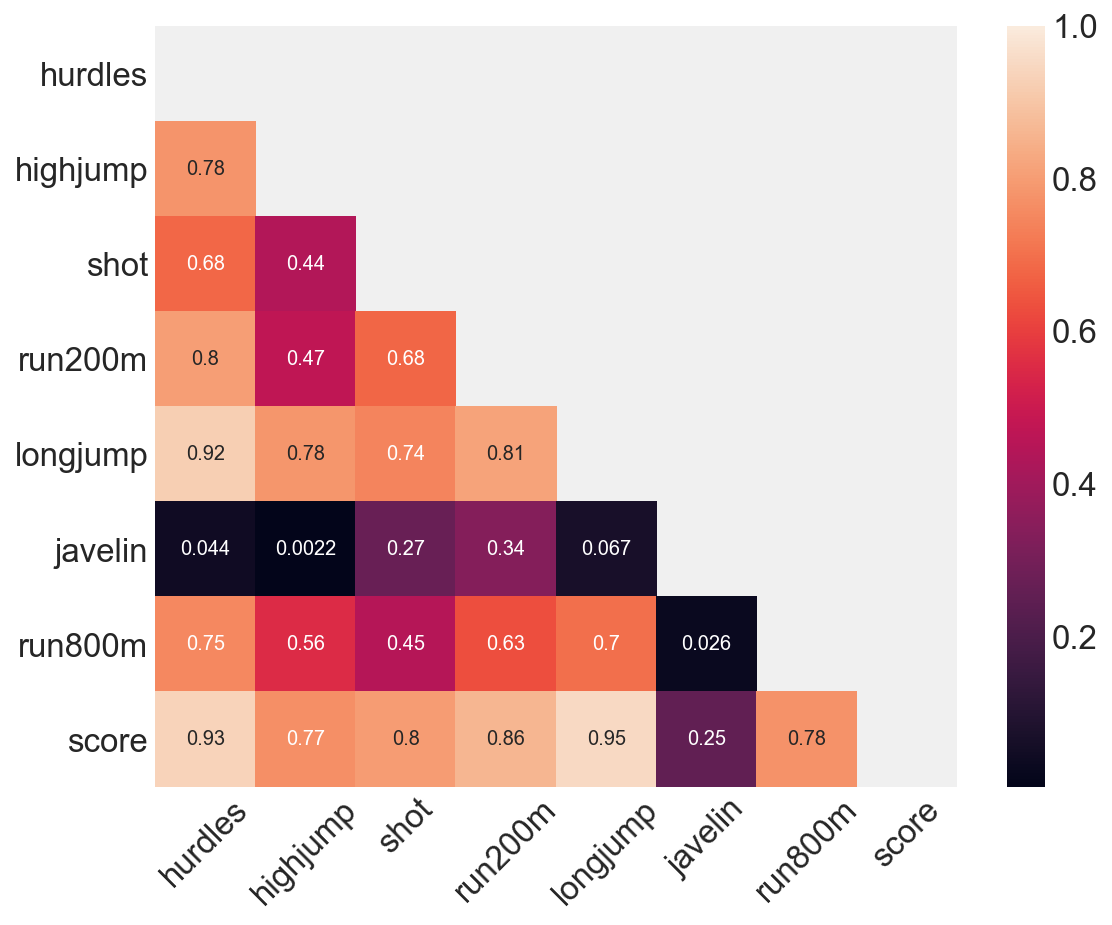

In [7]:
hep_corr = hep.corr()

mask = np.zeros_like(hep_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(hep_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim([len(hep_corr), 0])
plt.show()

**Note all correlations are positive.** Why? 

Recall that we altered the data such that higher numbers always indicate a higher score and likely a better athlete overall.

### 4. Standardize the data

In [8]:
# Split into features and targets
#   - You can control the ordering of the event columns by changing their positions here

EVENT_NAMES = ['hurdles', 'run200m', 'run800m',
               'highjump', 'shot', 'longjump', 'javelin']
TARGET_NAMES = ['score']

X = hep[EVENT_NAMES]
X.head()

,hurdles,run200m,run800m,highjump,shot,longjump,javelin
Joyner-Kersee (USA),7.880221,8.865248,6.225196,1.86,15.80,7.27,45.66
John (GDR),7.782101,8.456660,6.343165,1.80,16.23,6.71,42.56
Behmer (GDR),7.575758,8.658009,6.441224,1.83,14.20,6.68,44.54
Sablovskaite (URS),7.347539,8.361204,6.049607,1.80,15.23,6.25,42.78
Choubenkova (URS),7.401925,8.357710,6.254887,1.74,14.76,6.32,47.46


In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
hurdles,25.0,7.243730,0.359613,6.090134,7.107321,7.272727,7.423905,7.880221
run200m,25.0,8.126032,0.322889,7.515971,7.927071,8.054772,8.361204,8.865248
run800m,25.0,5.899610,0.336446,4.895062,5.777008,5.937361,6.049607,6.441224
highjump,25.0,1.782000,0.077942,1.500000,1.770000,1.800000,1.830000,1.860000
shot,25.0,13.117600,1.491884,10.000000,12.320000,12.880000,14.200000,16.230000
longjump,25.0,6.152400,0.474212,4.880000,6.050000,6.250000,6.370000,7.270000
javelin,25.0,41.482400,3.545656,35.680000,39.060000,40.280000,44.540000,47.500000


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xn = scaler.fit_transform(X)     # X normalized

### 5. Fit a PCA on the standardized data using sklearn

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 6. Create a DataFrame with the principal components

In [12]:
# Extract the principal components and put them into a dataframe
hep_dict = {'PC'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
pd.DataFrame(hep_dict, index=EVENT_NAMES)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
hurdles,-0.453707,-0.135053,0.008461,0.013882,0.155639,0.831752,0.244154
run200m,-0.411036,0.247127,-0.098093,-0.316650,0.647757,-0.163272,-0.462430
run800m,-0.372261,-0.173223,0.398762,-0.641188,-0.494592,-0.114500,-0.059598
highjump,-0.367425,-0.276340,0.414356,0.657053,-0.065649,-0.129238,-0.405232
shot,-0.369175,0.253476,-0.679521,0.142885,-0.518936,0.005700,-0.219014
longjump,-0.455970,-0.092220,-0.110666,0.122384,0.159264,-0.498348,0.694728
javelin,-0.086150,0.861141,0.430822,0.145966,-0.112234,0.057748,0.167835


#### Based on how the original variables are weighted to calculate the components, how would you describe PC1 and PC2?

PC1 describes athletes who are below the mean in all categories. We will describe them as "below average".

PC2 describes athletes who are best at particularly javelin. We will describe them as "javelin".

### 7. Express the athletes' performance in terms of the principal components

In [13]:
hep_pcs = pca.transform(Xn)
hep_pcs = pd.DataFrame(hep_pcs,
                       columns=['PC'+str(i+1)
                                for i in range(len(EVENT_NAMES))],
                       index=hep.index)
hep_pcs['score'] = hep['score']
hep_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,score
Joyner-Kersee (USA),-4.400791,1.159007,-0.391943,0.055114,0.534981,-0.242880,0.358763,7291
John (GDR),-3.070295,0.449857,-0.901411,-0.521204,-0.714819,0.347712,0.133539,6897
Behmer (GDR),-2.828234,0.670888,0.508974,-0.786620,0.079807,-0.270952,-0.125716,6858
Sablovskaite (URS),-1.356669,0.668543,-0.635637,-0.081463,-0.471548,-0.033753,-0.502329,6540
Choubenkova (URS),-1.431348,1.818897,0.071717,-0.822202,-0.671438,0.127554,0.222916,6540


In [14]:
hep_pcs.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,score
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000
mean,-2.486900e-16,3.552714e-17,1.776357e-17,8.881784e-18,-8.881784e-18,-2.886580e-17,3.330669e-17,6090.600000
std,2.157418e+00,1.097288e+00,7.279419e-01,7.134654e-01,5.187832e-01,2.740331e-01,2.236285e-01,568.469729
min,-4.400791e+00,-1.829635e+00,-1.091635e+00,-1.139541e+00,-8.624812e-01,-4.929499e-01,-5.023290e-01,4566.000000
25%,-1.118064e+00,-6.960583e-01,-6.356371e-01,-4.700682e-01,-4.596271e-01,-2.217932e-01,-1.257165e-01,5746.000000
50%,-7.252654e-02,-7.372001e-02,6.839888e-02,-2.177555e-01,6.743006e-02,-3.375281e-02,2.431988e-03,6137.000000
75%,1.173962e+00,6.908092e-01,5.089735e-01,3.457366e-01,2.141761e-01,2.488460e-01,1.226643e-01,6351.000000
max,6.066320e+00,2.849528e+00,1.969746e+00,1.711495e+00,1.107363e+00,5.454264e-01,5.106277e-01,7291.000000


In [15]:
# Always make sure you verify as much as possible your numbers are correct!
#   - At the minimum, let's ensure the athletes and scores still match up
hep.head(2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),7.880221,1.86,15.80,8.865248,7.27,45.66,6.225196,7291
John (GDR),7.782101,1.80,16.23,8.456660,6.71,42.56,6.343165,6897


### 8. Plot the variance explained (ratio) of your components

Explain what this chart tells you about your components.

In [16]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.63832499, 0.16512568, 0.07267193, 0.06981022, 0.03691008,
       0.01029863, 0.00685847])

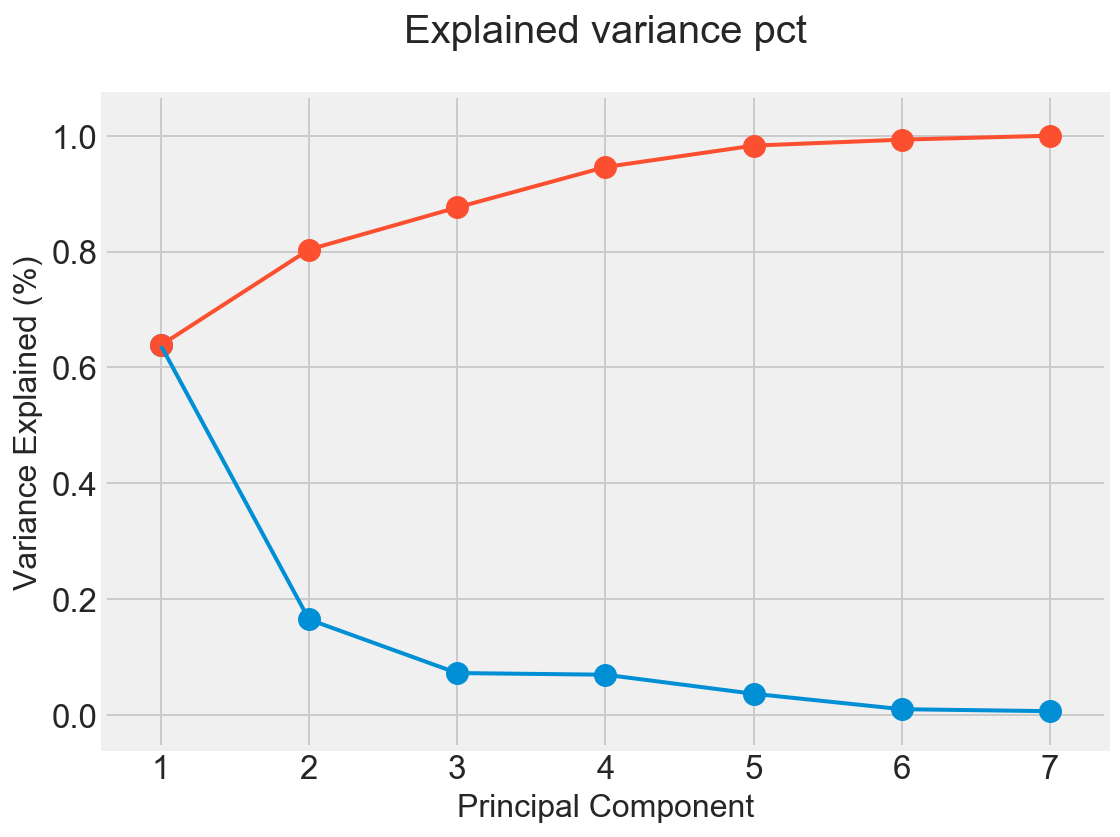

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, exp_var, lw=2)
ax.scatter(x_values, exp_var, s=120)
ax.plot(x_values, np.cumsum(exp_var), lw=2)
ax.scatter(x_values, np.cumsum(exp_var), s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

### 9. Plot PC1 vs. PC2. Which athletes are notable on each component?

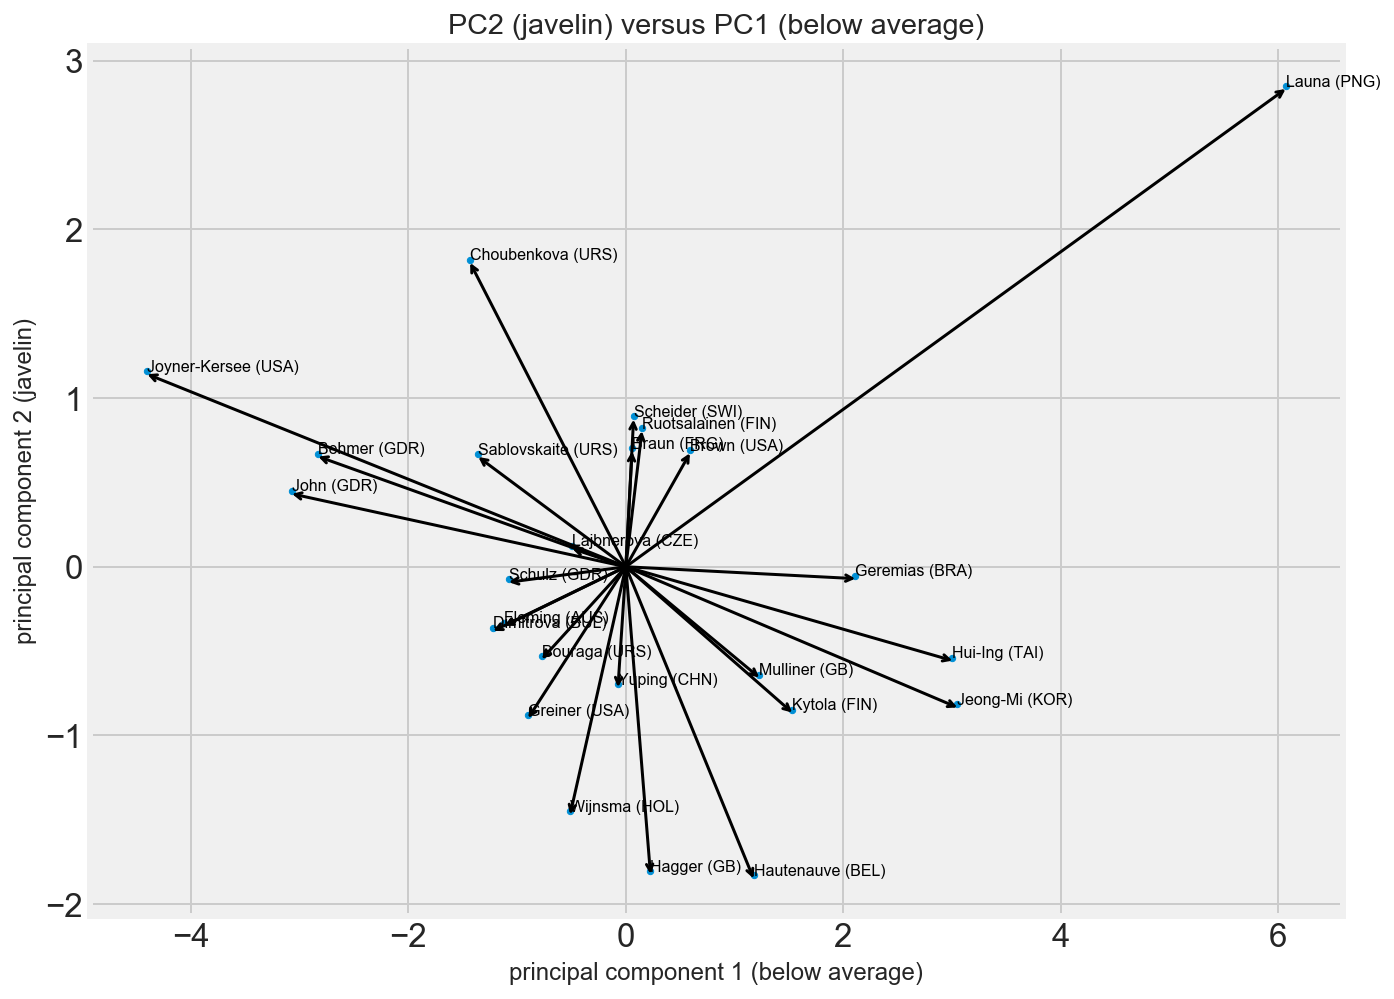

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(hep_pcs.PC1, hep_pcs.PC2, s=10)

for name in hep_pcs.index:
    ax.annotate(name,
                xy=(0, 0),
                xytext=(hep_pcs.PC1[name], hep_pcs.PC2[name]),
                arrowprops=dict(arrowstyle='<-',
                                color='black',
                                linewidth=1.5,
                                # the following commands serve to make the
                                # arrows end at the data point and not at
                                # some offset
                                relpos=(0, 0),
                                shrinkA=0,
                                shrinkB=0,
                                patchA=None,
                                ),
                xycoords='data',
                textcoords='data',
                fontsize=8,
                color="black",
                )

ax.set_title('PC2 (javelin) versus PC1 (below average)')
ax.set_xlabel('principal component 1 (below average)')
ax.set_ylabel('principal component 2 (javelin)')
plt.show()

### 10. Plot PC1 vs. score. Do our results make sense?

Remember: **always interpret your results**. Because we claimed that PC1 described "below average" athletes, we would guess that a larger PC1 value would have a lower score.

Let's graph it below and see if the scores agree with our intuition!

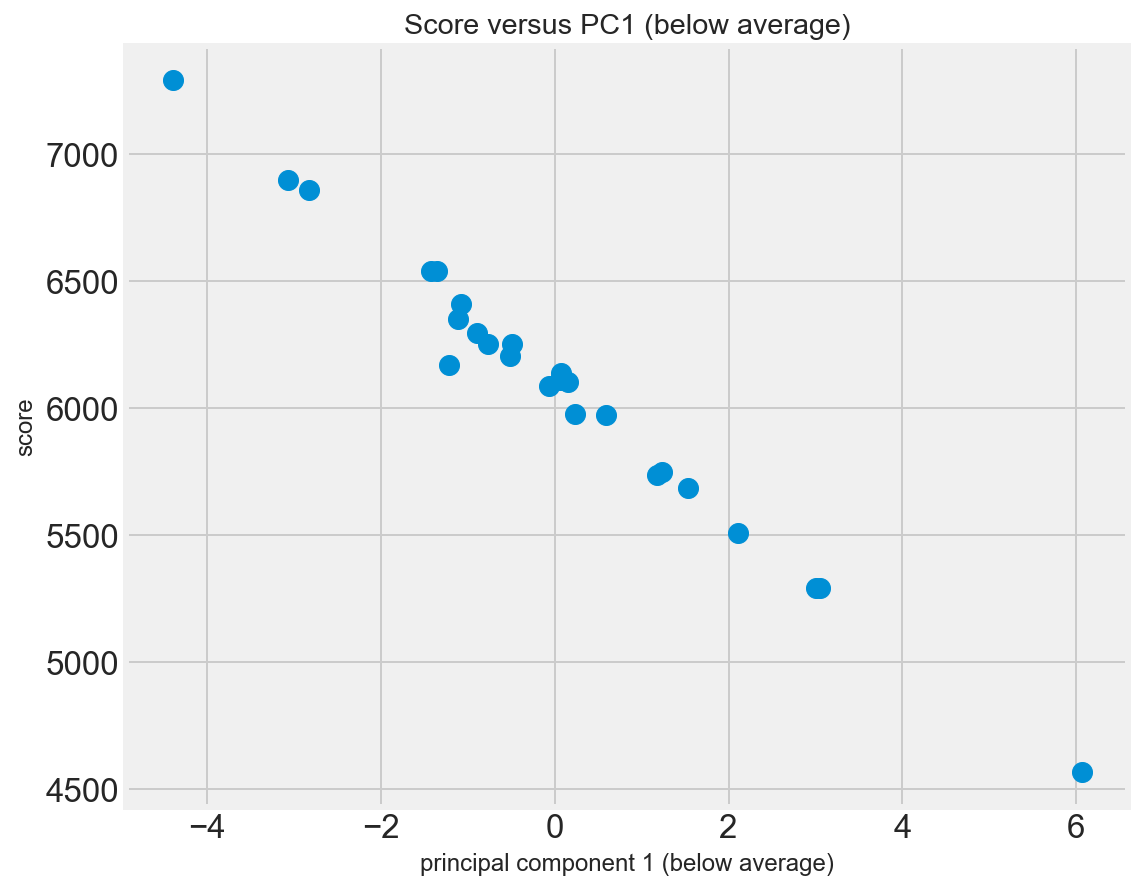

In [19]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(hep_pcs.PC1, hep_pcs.score, s=100)

ax.set_title('Score versus PC1 (below average)')
ax.set_xlabel('principal component 1 (below average)')
ax.set_ylabel('score')
plt.show()

**Does this graph agree with our guess above?** If not, then either our calculations or interpretation are likely incorrect! Thinking about the PCs allows us to provide evidence our results are correct -- and it helps us better understand the PCA results.

### 11. Plot PC2 vs. score. What does this tell you about the relationship between the events and the score?

Again, consider how an athlete's score would be affected if he/
she is better at javelin (our interpretation of PC2). After you understand how score _should be_ affected by PC2, look at the graph below. Does it agree with your expectation?

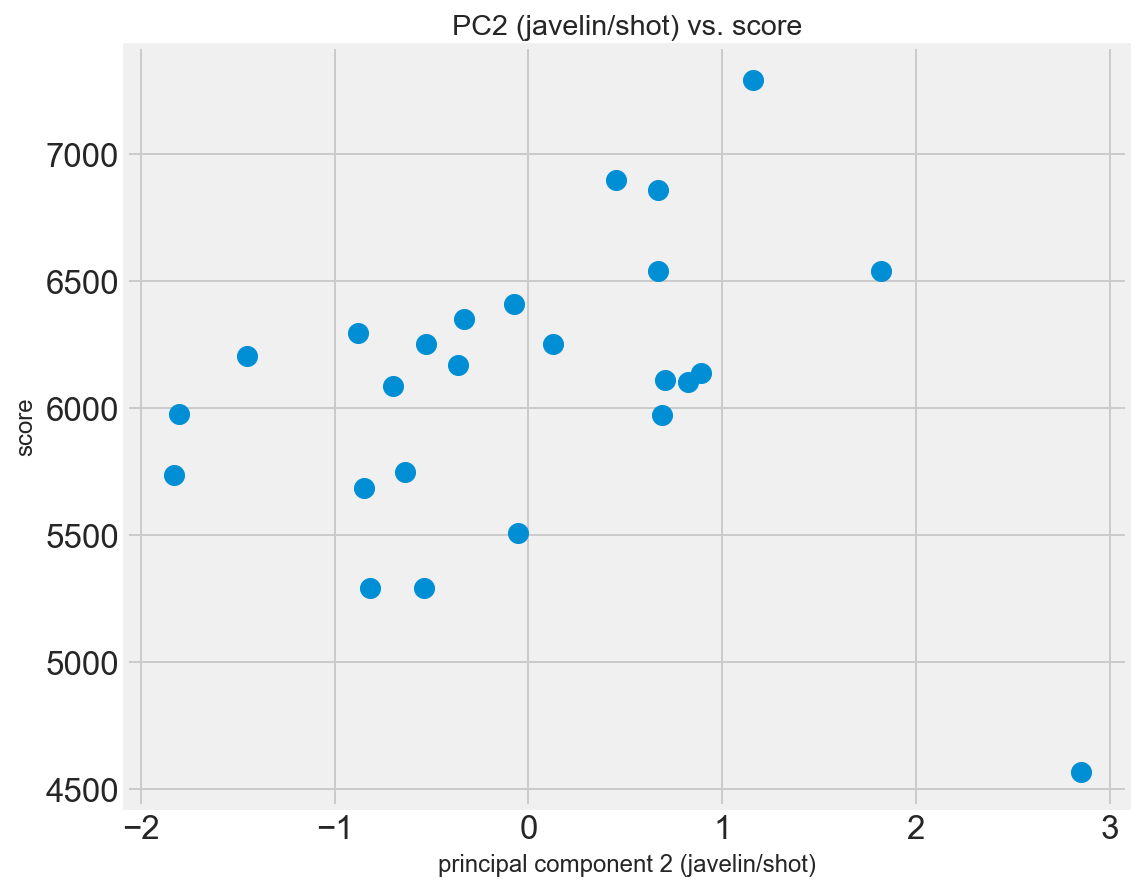

In [20]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(hep_pcs.PC2, hep_pcs.score, s=100)

ax.set_title('PC2 (javelin/shot) vs. score')
ax.set_xlabel('principal component 2 (javelin/shot)')
ax.set_ylabel('score')
plt.show()

**Tip:** Notice we have an outlier in the bottom right. Either outliers are genuine or bad data. It is typically useful to find the athlete corresponding to each outlier and determine if the data is bad.

#### Compare data values before and after rescaling

In [21]:
print(X.loc['Launa (PNG)'])
list(zip(X.columns, Xn[list(X.index).index('Launa (PNG)'), :]))

hurdles      6.090134
run200m      7.645260
run800m      4.895062
highjump     1.500000
shot        11.780000
longjump     4.880000
javelin     46.380000
Name: Launa (PNG), dtype: float64


[('hurdles', -3.2740297222512447),
 ('run200m', -1.5196728536862214),
 ('run800m', -3.0473287879481488),
 ('highjump', -3.6926687461964107),
 ('shot', -0.9150724430264014),
 ('longjump', -2.7385154950971944),
 ('javelin', 1.409779148589842)]

In [22]:
print(X.loc['Joyner-Kersee (USA)'])
list(zip(X.columns, Xn[list(X.index).index('Joyner-Kersee (USA)'), :]))

hurdles      7.880221
run200m      8.865248
run800m      6.225196
highjump     1.860000
shot        15.800000
longjump     7.270000
javelin     45.660000
Name: Joyner-Kersee (USA), dtype: float64


[('hurdles', 1.80643114649904),
 ('run200m', 2.3365908761144705),
 ('run800m', 0.9876763292970561),
 ('highjump', 1.0213764617139054),
 ('shot', 1.8350705152317734),
 ('longjump', 2.4053480959765974),
 ('javelin', 1.2025264152133524)]

## Part II: Wine Quality Dataset
<a id="partii"></a>

Now it's your turn! Try repeating the above analysis to investigate wine quality data. As much as possible, try to perform the analyses without looking above. Remember that most of the above is just manipulating Pandas data and plotting!

### 1. Load the wine data

In [23]:
wine = pd.read_csv(
    '../../../../resource-datasets/wine_data/winequality_merged.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### 2. Subset the wine data to everything except the `red_wine` column

In [24]:
WINE_TARGETS = ['red_wine']
WINE_FEATURES = list(set(wine.columns) - set(WINE_TARGETS))

wine_cont = wine[WINE_FEATURES]

### 3. Examine the correlation between variables

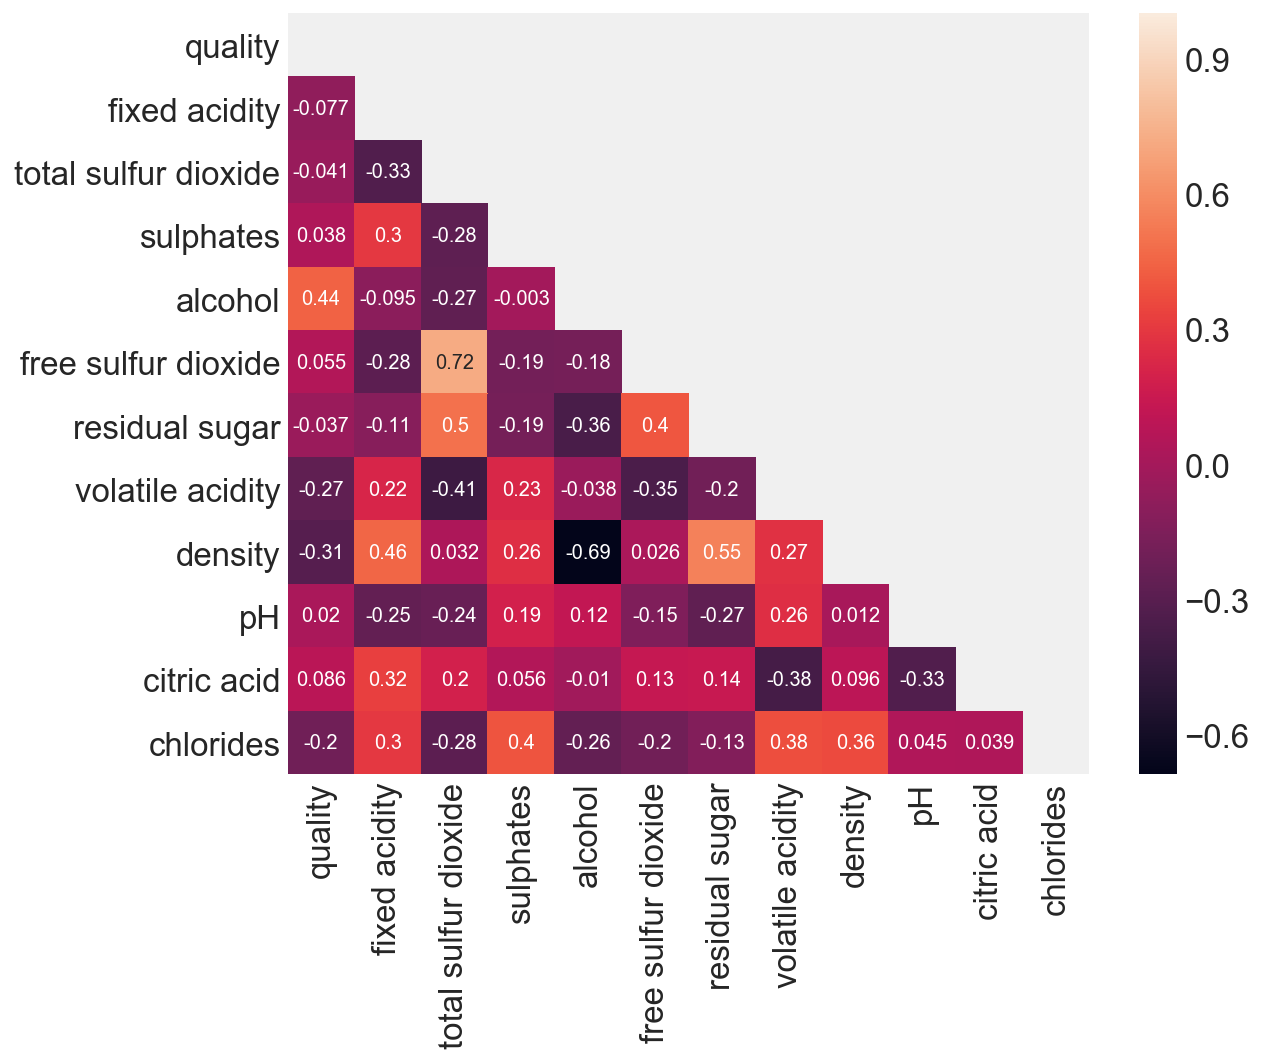

In [25]:
wine_corr = wine_cont.corr()

mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(wine_corr, mask=mask, annot=True)
ticklabels = ax.xaxis.get_ticklabels()
ax.set_ylim([len(wine_corr), 0])
plt.show()

### 4. Standardize the variables

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_cont_n = scaler.fit_transform(wine_cont)

### 5. Fit a PCA on the standardized data

Create a new dataframe with the principal components and the `red_wine` column added back in from the original data.

In [27]:
from sklearn.decomposition import PCA

wine_pca = PCA().fit(wine_cont_n)

### 6. Create a DataFrame with the principal components

In [28]:
wine_pcs = wine_pca.transform(wine_cont_n)
wine_pcs = pd.DataFrame(wine_pcs,
                        columns=['PC'+str(i) for i in range(1, wine_pcs.shape[1]+1)])

wine_pcs['red_wine'] = wine.red_wine

In [29]:
wine_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,red_wine
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,-0.114802,-0.449160,-0.258251,-0.014469,1
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350,-0.120635,-0.272888,-0.081613,0.053961,1
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690,-1.294900,0.212574,0.120527,-0.100574,1
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1


### 7. Plot the variance explained ratio of the components

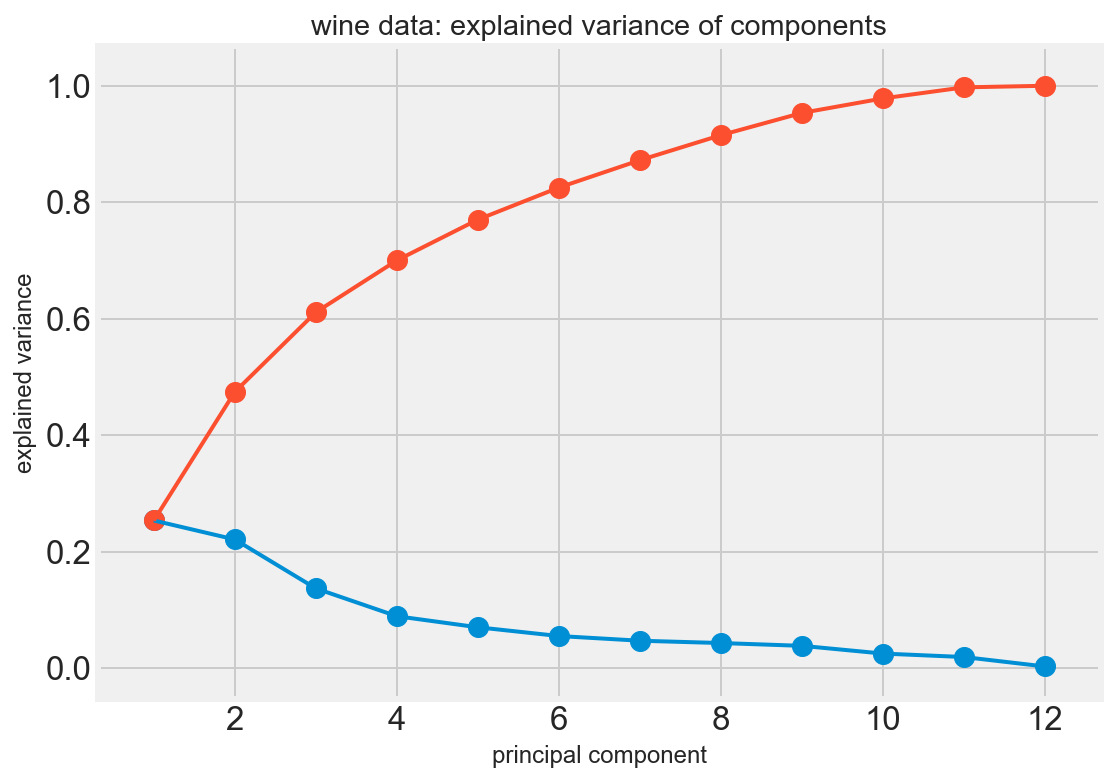

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

x_values = list(range(1, wine_pca.n_components_+1))

ax.plot(x_values, wine_pca.explained_variance_ratio_, lw=2)
ax.scatter(x_values, wine_pca.explained_variance_ratio_, s=100)
ax.plot(x_values, np.cumsum(wine_pca.explained_variance_ratio_), lw=2)
ax.scatter(x_values, np.cumsum(wine_pca.explained_variance_ratio_), s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

### 8. Print out the component weights with their corresponding variables for PC1, PC2, and PC3

How would you label the components based on the weights?

In [31]:
pd.DataFrame(wine_pca.components_.T, index=wine_cont.columns)

,0,1,2,3,4,5,6,7,8,9,10,11
quality,0.087476,-0.296601,0.295838,0.472439,0.459129,0.277888,-0.273177,-0.093046,-0.356647,-0.307830,0.018082,0.008288
fixed acidity,-0.256929,0.261843,0.467486,-0.143964,0.165363,-0.030037,0.393435,-0.001155,-0.424169,0.272432,0.276932,-0.335093
total sulfur dioxide,0.474420,0.143948,-0.101281,0.132232,-0.223967,0.106769,0.234813,-0.011279,-0.001814,-0.294780,0.720162,0.064063
sulphates,-0.299852,0.119634,0.168691,0.588020,-0.193246,0.020141,0.170236,0.592221,0.297401,-0.085469,-0.047219,-0.078200
alcohol,-0.058924,-0.492727,0.212931,0.080032,0.116023,0.169475,0.338906,-0.226041,0.417060,0.416059,0.191289,0.332012
free sulfur dioxide,0.422691,0.111179,-0.098998,0.303306,-0.248452,0.283180,0.362714,-0.120098,-0.301397,0.303448,-0.486158,-0.000905
residual sugar,0.318905,0.342585,-0.075502,0.112456,0.507921,0.063317,-0.095763,-0.081945,0.488024,0.207174,-0.005144,-0.451215
volatile acidity,-0.394931,0.105198,-0.279689,-0.080058,0.147774,0.382664,0.445111,-0.310078,0.123233,-0.493946,-0.140799,-0.082421
density,-0.092438,0.554920,-0.051563,0.150579,0.330357,-0.154553,0.013286,-0.042944,-0.071081,0.076815,0.003324,0.715667
pH,-0.208070,-0.152922,-0.406787,0.471478,-0.001458,-0.560897,0.079321,-0.362282,-0.136662,0.112409,0.139083,-0.206763


**Note:** It is interesting to research what causes these factors in wines. For example, is SO2 added to wine, or is it a natural byproduct of ingredients? What affects how much SO2 a winemaker might add to wine? By researching these questions, you can likely find a good explanation for these PCs -- beyond a bland description of the weightings. You can also use these intuitions from research (e.g. how pH and residual sugar affect SO2) to provide evidence of the PC validity.

### 9. Plot PC1 vs. PC2

- Use a regular scatterplot.
- Vary the alpha value to see better densities.

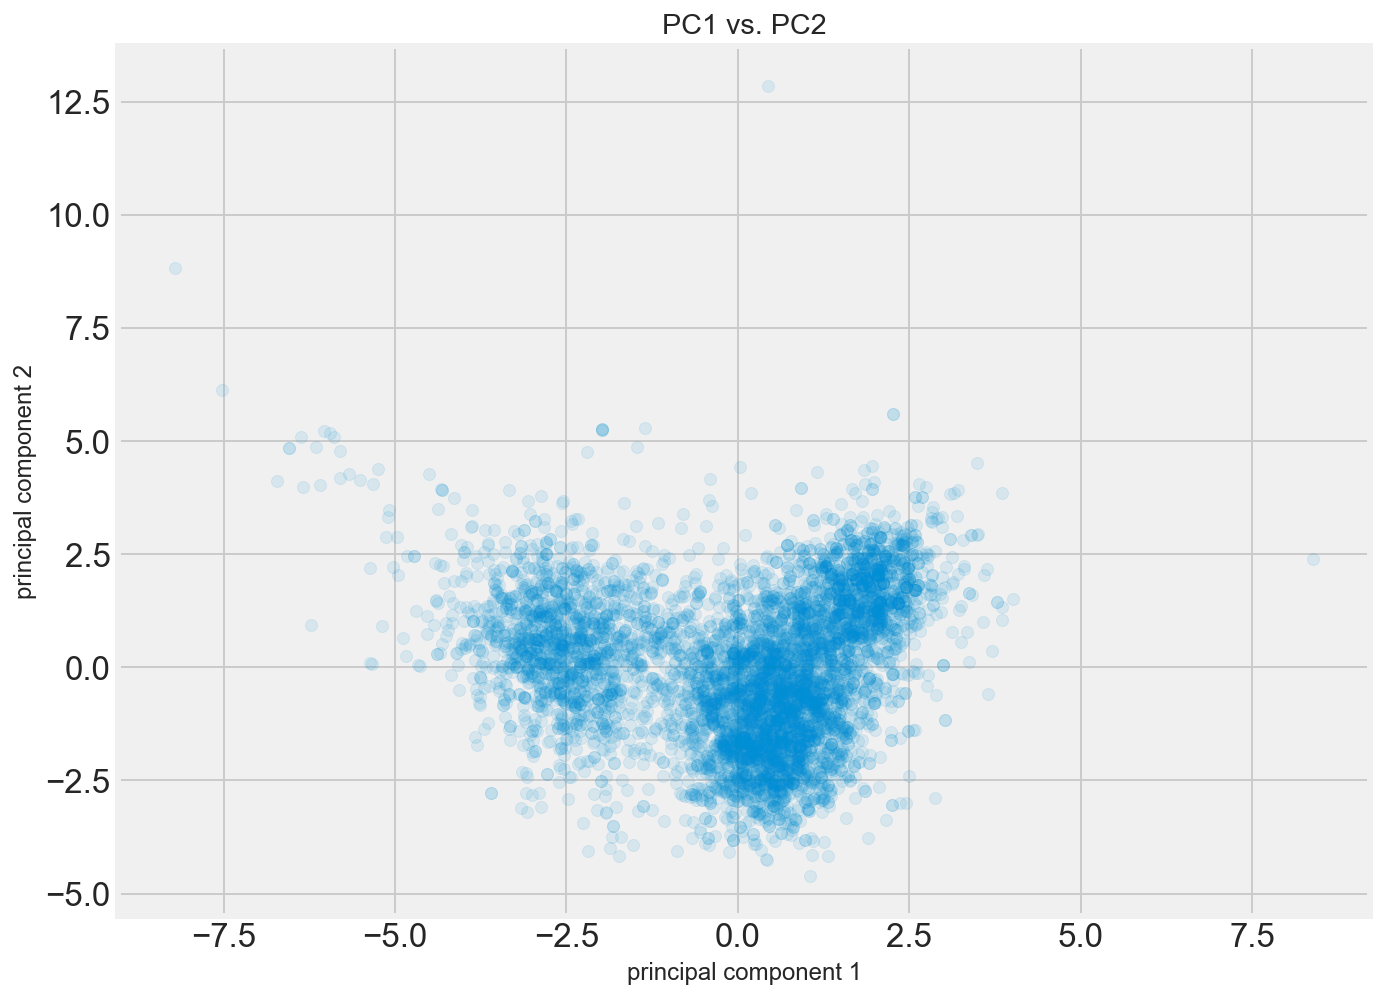

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(wine_pcs.PC1, wine_pcs.PC2, alpha=0.1)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

### 10. Plot a seaborn pairplot of PC1, PC2, and PC3 with `hue='red_wine'`

Do any of the components differentiate red and white wine? If so, what does this tell you about the difference between red and white wine based on the component weights? Does each plot align with your expectation based on the components?

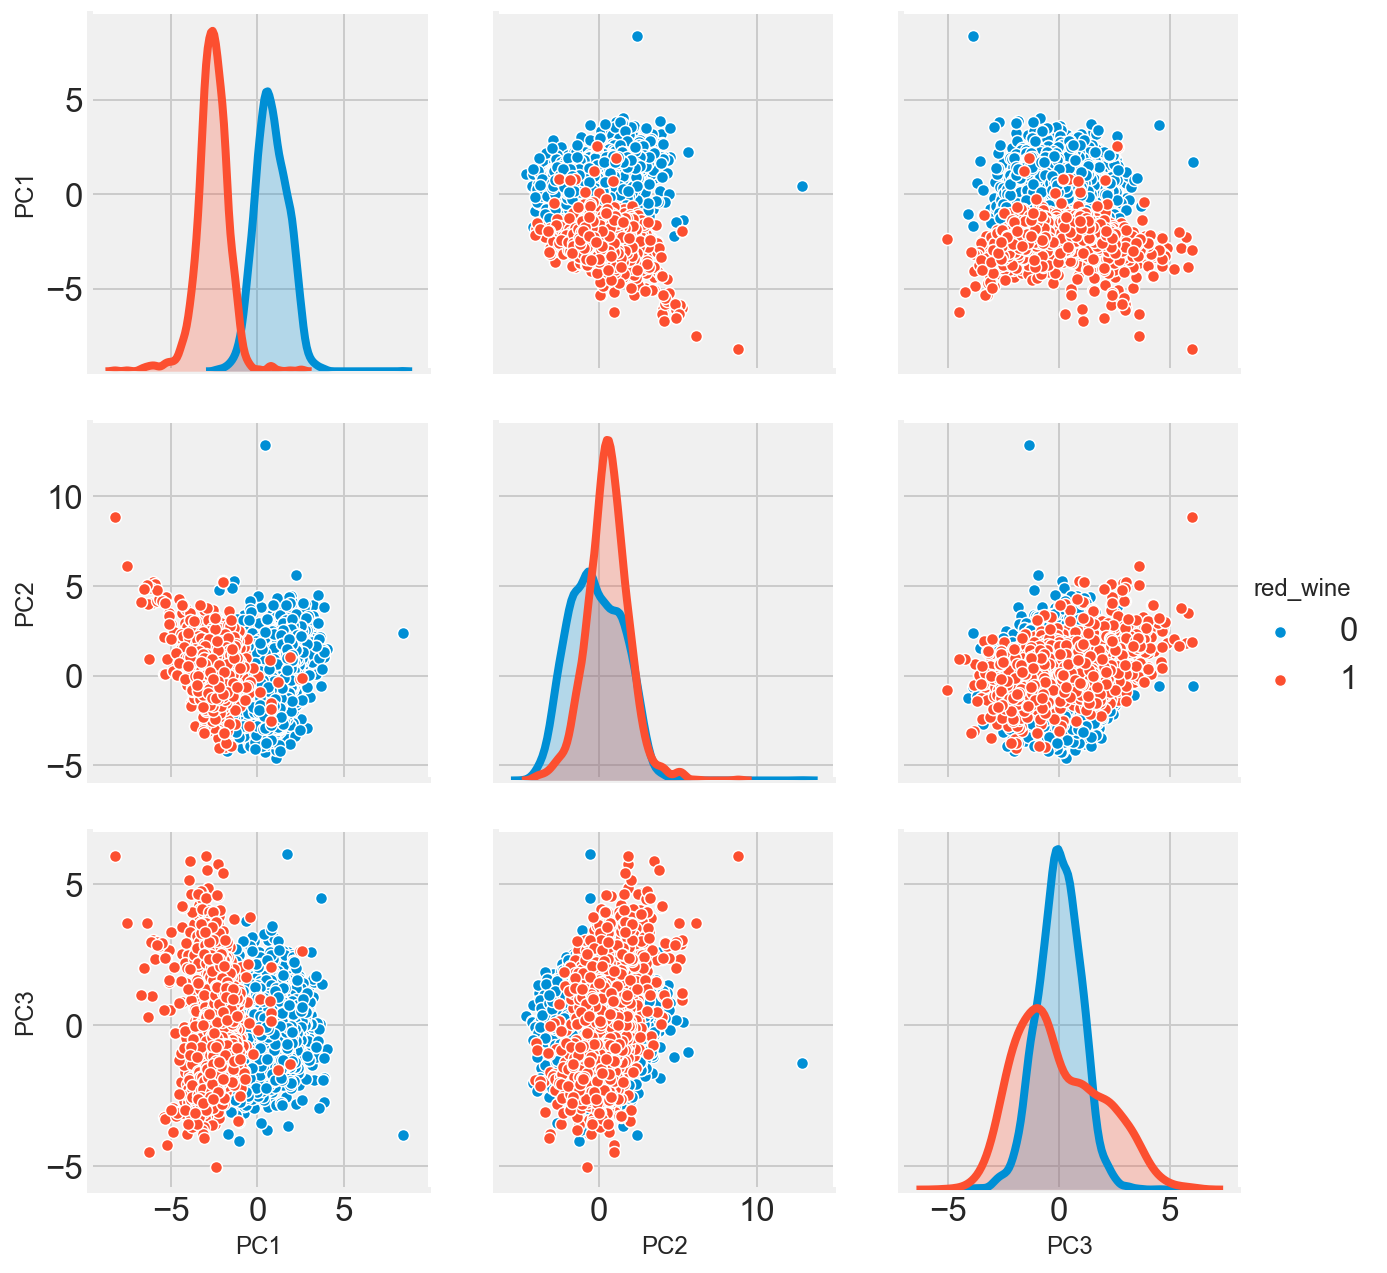

In [33]:
sns.pairplot(data=wine_pcs, vars=['PC1', 'PC2', 'PC3'], 
             hue='red_wine', height=3)
plt.show()